# Imports

In [207]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import hyperspy.api as hs
from esmpy.estimators import SmoothNMF
import esmpy.datasets as ds

import matplotlib.pyplot as plt
import numpy as np

from esmpy.models.EDXS_function import print_concentrations_from_W

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generating artificial datasets and loading them

If the datasets were already generated, they are not generated again

**This is optional**

In [208]:
ds.generate_built_in_datasets(seeds_range=5)
spim = ds.load_particules(sample = 0)

# Loading your data and settings

There are three things to fill here : 
- An input filename in the ``hs.load()`` function
- The acquisition parameters in the ``spim.set_analysis_parameters()`` function. Be careful the previous metadata are overwritten. (I still need to build a function that does not overwrite the already present settings)
- if required you can set the concentrations of some elements in some phases with the function ``spim.set_fixed_W()``. The name of the phases can be changed.

In [259]:
spim = hs.load("../generated_datasets/FpBrgCaPv_N293_paper/sample_5.hspy")

# spim.axes_manager[-1].offset = 12000
spim.set_signal_type("EDS_ESMPY")
spim.set_analysis_parameters(beam_energy = 200,
azimuth_angle = 0.0,
elevation_angle = 22.0,
tilt_stage = 0.0,
elements = ["Si","Mg","Fe"],
thickness = 200e-7,
density = 3.5,
detector_type = "SDD_efficiency.txt",
width_slope = 0.01,
width_intercept = 0.065,
xray_db = "default_xrays.json")
G = spim.build_G("bremsstrahlung", norm = True)
fW = spim.set_fixed_W({"p0" : {"Si" : 0.0},"p1" : {"Fe" : 0.0}, "p2" : {"Mg" : 0.0}})

# Problem solving

Full hyperspy syntax

## Loading analysis parameters

In [260]:
G = spim.build_G("bremsstrahlung", norm = True)
shape_2d = spim.shape_2d
phases = spim.phases
maps = spim.maps
print(G)
est = SmoothNMF( n_components = 3,tol=0.000001, max_iter = 1000, G = None, mu=0, lambda_L=0,  force_simplex=False) #  true_D = phases, true_A = weights

<bound method EDS_ESMPY.update_G of <EDS_ESMPY, title: , dimensions: (128, 128|500)>>


## Calculating the decomposition

/!\ Depending on the parameters you choose and the size of the data it might take a while

In [261]:
out = spim.decomposition(algorithm = est, return_info=True)

TypeError: To perform a decomposition the data must be of the float or complex type, but the current type is 'int64'. To fix this issue, you can change the type using the change_dtype method (e.g. s.change_dtype('float64')) and then repeat the decomposition.
No decomposition was performed.

## Getting the losses and the results of the decomposition

- First cell : Printing the resulting concentrations.
- Second cell : Ploting the resulting spectra
- Thrid cell : Ploting the resulting abundances

In [ ]:
print_concentrations_from_W(est.W_, elements = spim.metadata.Sample.elements)

AttributeError: 'SmoothNMF' object has no attribute 'W_'

In [ ]:
spim.plot_decomposition_loadings(3)

RuntimeError: No learning results found. A 'decomposition' needs to be performed first.

In [262]:
spim.plot_decomposition_factors(3)

RuntimeError: No learning results found. A 'decomposition' needs to be performed first.

# Problem Solving

With the usual scikit use

In [263]:
G = spim.build_G("bremsstrahlung")
shape_2d = spim.shape_2d
# phases, weights = spim.phases, spim.weights
X = spim.X
est = SmoothNMF( n_components = 3,tol=0.000001, max_iter = 1000, G = None, lambda_L= 0, mu=0, force_simplex=False)

In [264]:
pixels_side = 128

Ximg = X.reshape((-1, pixels_side,pixels_side))
print(Ximg.shape)

(500, 128, 128)


(500, 256)
3
It 10 / 1000: loss 0.008,  139.495 it/s
It 20 / 1000: loss 0.008,  143.507 it/s


/Users/maxmartinezruts/.local/share/virtualenvs/esmpy-kBfF6zeU/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


It 30 / 1000: loss 0.008,  148.238 it/s
It 40 / 1000: loss 0.008,  145.592 it/s
It 50 / 1000: loss 0.008,  149.329 it/s
It 60 / 1000: loss 0.008,  151.748 it/s
It 70 / 1000: loss 0.008,  153.143 it/s
It 80 / 1000: loss 0.008,  155.222 it/s
It 90 / 1000: loss 0.008,  157.897 it/s
It 100 / 1000: loss 0.008,  159.725 it/s
It 110 / 1000: loss 0.008,  159.332 it/s
It 120 / 1000: loss 0.008,  159.958 it/s
exits because of relative change < tol: 1.2725854626867897e-06
Stopped after 121 iterations in 0.0 minutes and 1.0 seconds.


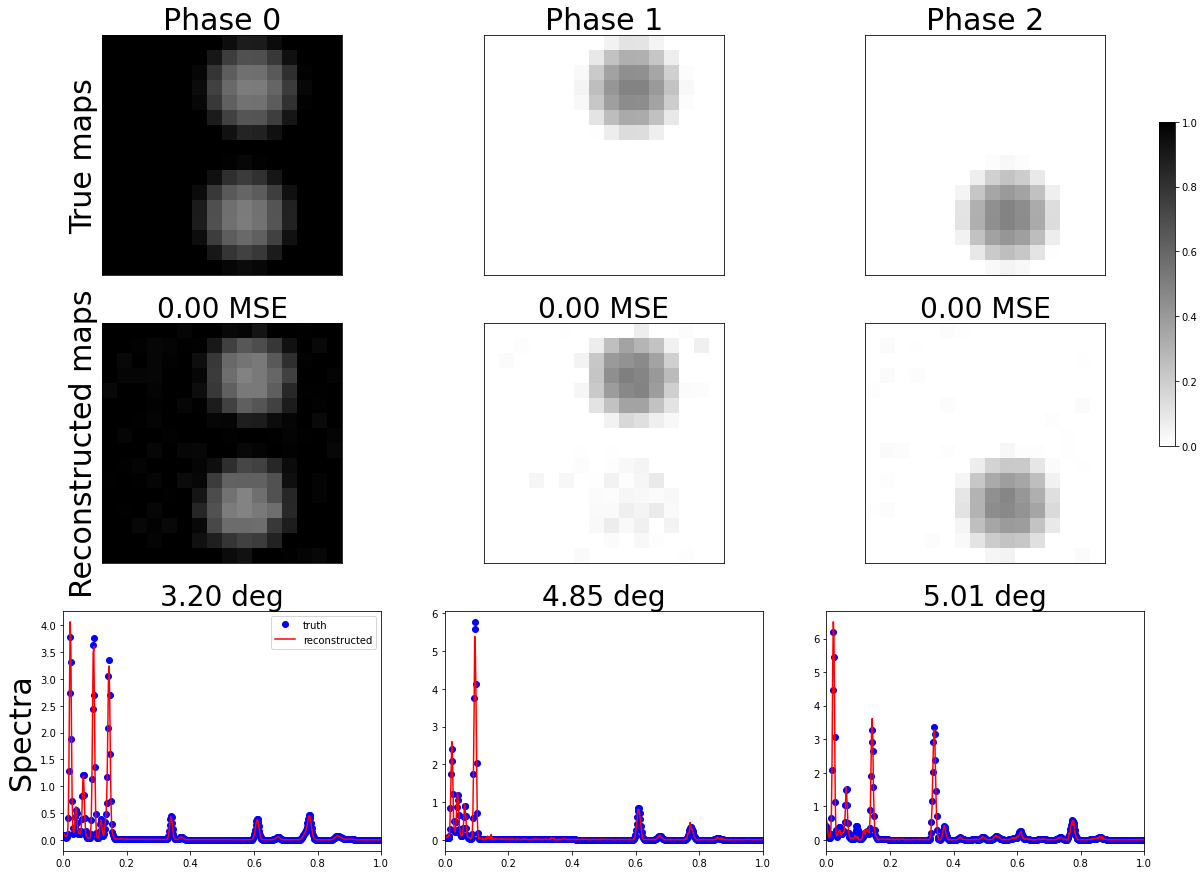

(500, 1024)
3


/Users/maxmartinezruts/.local/share/virtualenvs/esmpy-kBfF6zeU/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


It 10 / 1000: loss 0.023,  49.450 it/s
It 20 / 1000: loss 0.023,  54.102 it/s
It 30 / 1000: loss 0.023,  55.989 it/s
It 40 / 1000: loss 0.023,  56.435 it/s
It 50 / 1000: loss 0.023,  56.507 it/s
It 60 / 1000: loss 0.023,  56.511 it/s
It 70 / 1000: loss 0.023,  56.637 it/s
It 80 / 1000: loss 0.023,  57.061 it/s
It 90 / 1000: loss 0.023,  57.513 it/s
It 100 / 1000: loss 0.023,  57.787 it/s
It 110 / 1000: loss 0.023,  57.809 it/s
It 120 / 1000: loss 0.023,  58.132 it/s
exits because of relative change < tol: 1.0827013526010078e-06
Stopped after 129 iterations in 0.0 minutes and 2.0 seconds.


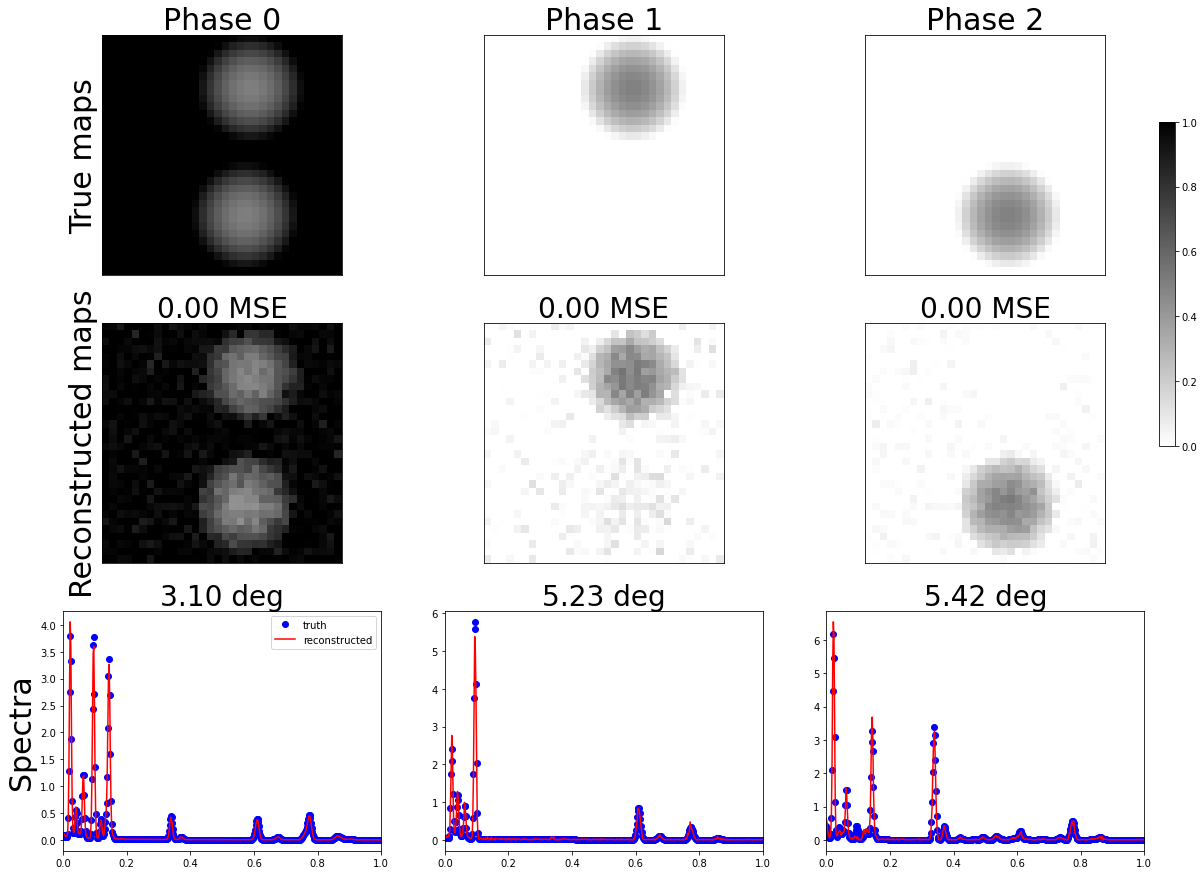

(500, 4096)
3


/Users/maxmartinezruts/.local/share/virtualenvs/esmpy-kBfF6zeU/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


It 10 / 1000: loss 0.058,  16.463 it/s
It 20 / 1000: loss 0.058,  17.066 it/s
It 30 / 1000: loss 0.057,  17.037 it/s
It 40 / 1000: loss 0.057,  16.929 it/s
It 50 / 1000: loss 0.057,  16.948 it/s
It 60 / 1000: loss 0.057,  16.967 it/s
It 70 / 1000: loss 0.057,  16.927 it/s
It 80 / 1000: loss 0.057,  16.994 it/s
It 90 / 1000: loss 0.057,  17.090 it/s
It 100 / 1000: loss 0.057,  17.179 it/s
It 110 / 1000: loss 0.057,  17.196 it/s
It 120 / 1000: loss 0.057,  17.255 it/s
It 130 / 1000: loss 0.057,  17.252 it/s
It 140 / 1000: loss 0.057,  17.300 it/s
It 150 / 1000: loss 0.057,  17.289 it/s
It 160 / 1000: loss 0.057,  17.308 it/s
It 170 / 1000: loss 0.057,  17.343 it/s
It 180 / 1000: loss 0.057,  17.356 it/s
It 190 / 1000: loss 0.057,  17.334 it/s
It 200 / 1000: loss 0.057,  17.325 it/s
It 210 / 1000: loss 0.057,  17.322 it/s
It 220 / 1000: loss 0.057,  17.341 it/s
It 230 / 1000: loss 0.057,  17.356 it/s
It 240 / 1000: loss 0.057,  17.365 it/s
It 250 / 1000: loss 0.057,  17.360 it/s
It 260 / 

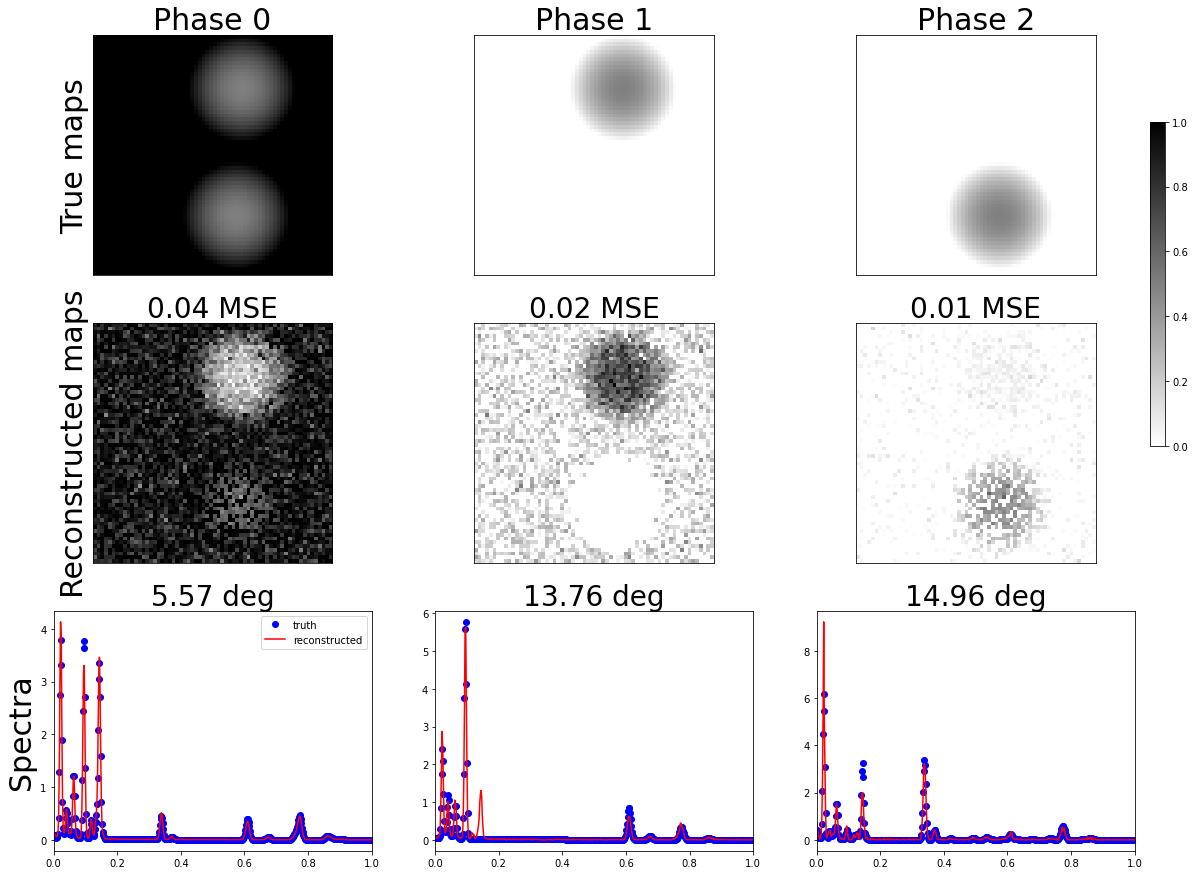

(500, 16384)
3


/Users/maxmartinezruts/.local/share/virtualenvs/esmpy-kBfF6zeU/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


It 10 / 1000: loss 0.128,  4.610 it/s
It 20 / 1000: loss 0.128,  4.796 it/s
It 30 / 1000: loss 0.128,  4.864 it/s
It 40 / 1000: loss 0.128,  4.794 it/s
It 50 / 1000: loss 0.128,  4.801 it/s
It 60 / 1000: loss 0.128,  4.766 it/s
Stopped after 69 iterations in 0.0 minutes and 15.0 seconds.


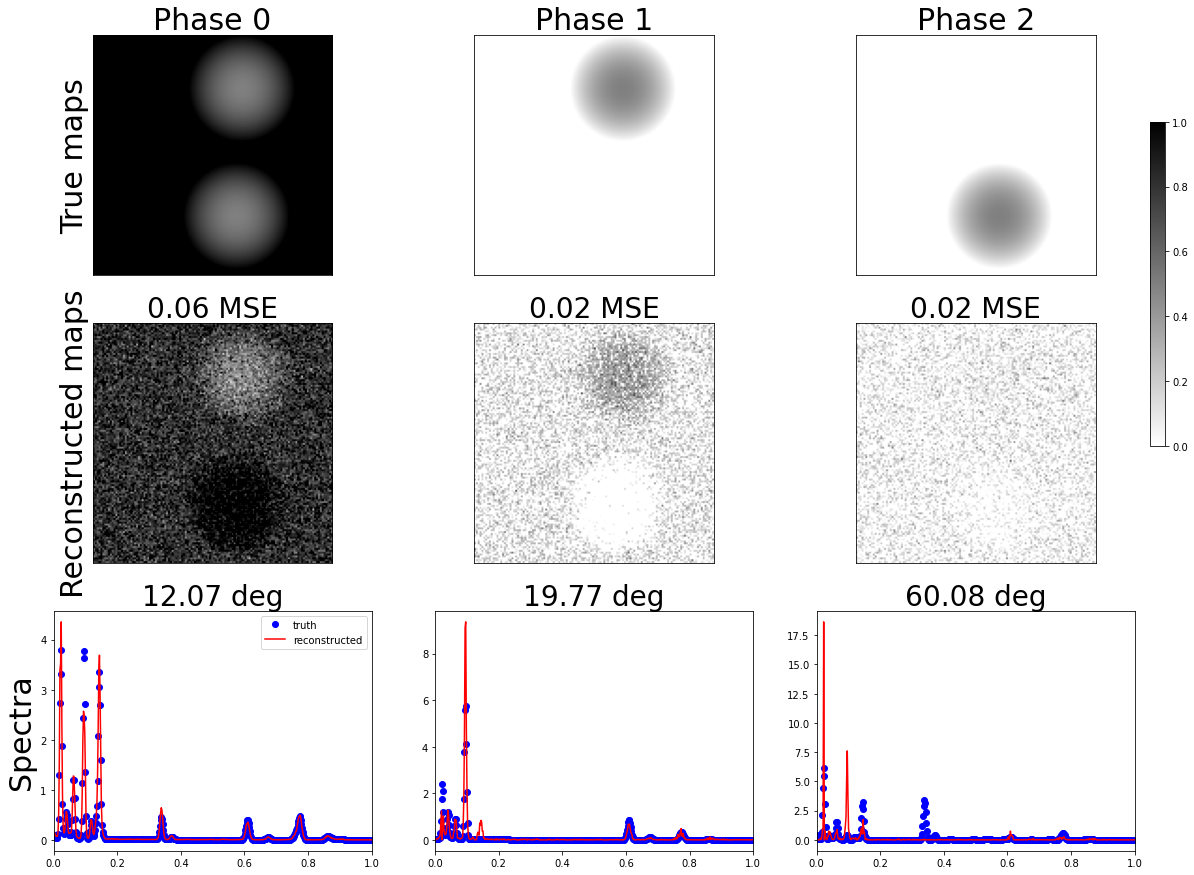

In [265]:
downsampling_factors = [8,4,2,1]
for i in range(len(downsampling_factors)):
    n = downsampling_factors[i]
    X_ = downsample(Ximg,n)
    Xflat = X_.reshape((X_.shape[0], -1))
    print(Xflat.shape)
    D = est.fit_transform(Xflat)
    Hflat = est.H_
    W = est.W_
 

    plot_results(spim.phases, W, downsample_flat(spim.maps,n, pixels_side), Hflat, pixels_side//n)

In [256]:
def downsample(X,n):
    b = X.shape[2]//n
    return X.reshape(X.shape[0], -1, n, b, n).sum((-1, -3)) /(n*n)

def downsample_flat(X,n, pixels_side):
    X = X.reshape((-1, pixels_side,pixels_side))
    X = downsample(X,n)
    return X.reshape((-1, pixels_side*pixels_side//n//n))


In [245]:
from esmpy.measures import find_min_angle, find_min_MSE, ordered_mse

def plot_results(Ddot, D, Hdotflat, Hflat, n_pixel_side):
    fontsize = 30
    scale = 15
    aspect_ratio = 1.4
    marker_list = ["-o","-s","->","-<","-^","-v","-d"]
    mark_space = 20
    # cmap = plt.cm.hot_r    
    cmap = plt.cm.gray_r
    vmax = 1
    vmin = 0
    K = len(H)
    L = len(D)
    
    angles, true_inds = find_min_angle(Ddot.T, D.T, unique=True, get_ind=True)
    mse = ordered_mse(Hdotflat, Hflat, true_inds)


    fig, axes = plt.subplots(K,3,figsize = (scale/K * 3 * aspect_ratio,scale))
    x = np.linspace(0,1, num = L)
    for i in range(K): 
        axes[2,i].plot(x,Ddot.T[i,:],'bo',label='truth',linewidth=4)
        axes[2,i].plot(x,D[:,true_inds[i]],'r-',label='reconstructed',markersize=3.5)
        axes[2,i].set_title("{:.2f} deg".format(angles[i]),fontsize = fontsize-2)
        axes[2,i].set_xlim(0,1)

        axes[1,i].imshow((Hflat[true_inds[i],:]).reshape(n_pixel_side,n_pixel_side),vmin = vmin, vmax = vmax , cmap=cmap)
        axes[1,i].set_title("{:.2f} MSE".format(mse[true_inds[i]]),fontsize = fontsize-2)
        # axes[i,1].set_ylim(0.0,1.0)
        axes[1,i].tick_params(axis = "both",labelleft = False, labelbottom = False,left = False, bottom = False)

        im = axes[0,i].imshow(Hdotflat[i].reshape(n_pixel_side,n_pixel_side),vmin = vmin, vmax = vmax, cmap=cmap)
        axes[0,i].set_title("Phase {}".format(i),fontsize = fontsize)
        axes[0,i].tick_params(axis = "both",labelleft = False, labelbottom = False,left = False, bottom = False)
        axes[2,0].legend()

    rows = ["True maps","Reconstructed maps","Spectra"]

    for ax, row in zip(axes[:,0], rows):
        ax.set_ylabel(row, rotation=90, fontsize=fontsize)


    fig.subplots_adjust(right=0.84)
    # put colorbar at desire position
    cbar_ax = fig.add_axes([0.85, 0.5, 0.01, 0.3])
    fig.colorbar(im,cax=cbar_ax)

    # fig.tight_layout()

    plt.show()